In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

In [16]:
def combine_files(paths, output_path=None):
    df = pd.DataFrame()
    for path in paths:
        df_i = pd.read_csv(path,index_col=None)
        df = pd.concat([df, df_i], axis=0)
    if output_path is not None:
        df.to_csv(output_path,index=False)
    return df

In [96]:
def plotting(oper_char_df):
    #sns.histplot(oper_char_df["sparsity size"])
    #plt.show()

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(12,8))

    print("Mean coverage rate/length:")
    print(oper_char_df.groupby(['p', 'method']).mean())

    cov_plot = sns.boxplot(y=oper_char_df["coverage rate"],
                           x=oper_char_df["p"],
                           hue=oper_char_df["method"],
                           palette="pastel",
                           orient="v", ax=ax1,
                           showmeans=True,
                           linewidth=1)
    cov_plot.set(title='Coverage')
    cov_plot.set_ylim(0., 1.05)
    #plt.tight_layout()
    cov_plot.axhline(y=0.9, color='k', linestyle='--', linewidth=1)
    #ax1.set_ylabel("")  # remove y label, but keep ticks

    len_plot = sns.boxplot(y=oper_char_df["avg length"],
                           x=oper_char_df["p"],
                           hue=oper_char_df["method"],
                           palette="pastel",
                           orient="v", ax=ax2,
                           linewidth=1)
    len_plot.set(title='Length')
    # len_plot.set_ylim(0, 100)
    # len_plot.set_ylim(3.5, 7.8)
    # plt.tight_layout()
    # ax2.set_ylabel("")  # remove y label, but keep ticks

    handles, labels = ax2.get_legend_handles_labels()
    # fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.2)
    fig.subplots_adjust(bottom=0.2)
    fig.legend(handles, labels, loc='lower center', ncol=4)

    F1_plot = sns.boxplot(y=oper_char_df["F1 score"],
                          x=oper_char_df["p"],
                          hue=oper_char_df["method"],
                          palette="pastel",
                          orient="v", ax=ax3,
                          linewidth=1)
    F1_plot.set(title='F1 score')
    
    F1pi_plot = sns.boxplot(y=oper_char_df["F1 score (post inf)"],
                          x=oper_char_df["p"],
                          hue=oper_char_df["method"],
                          palette="pastel",
                          orient="v", ax=ax4,
                          linewidth=1)
    F1pi_plot.set(title='F1 score (post inf)')
    
    size_plot = sns.boxplot(y=oper_char_df["E size"],
                          x=oper_char_df["p"],
                          hue=oper_char_df["method"],
                          palette="pastel",
                          orient="v", ax=ax5,
                          linewidth=1)
    size_plot.set(title='|E|')

    cov_plot.legend_.remove()
    len_plot.legend_.remove()
    F1_plot.legend_.remove()
    F1pi_plot.legend_.remove()
    size_plot.legend_.remove()

    plt.suptitle("Naive and Data Splitting (s=4)")
    plt.subplots_adjust(wspace=0.5, hspace=1)
    plt.show()
    
def plotting_randomization(oper_char_df, x_axis='p', hue='method', plot_size=False):
    #sns.histplot(oper_char_df["sparsity size"])
    #plt.show()
    if plot_size:
        fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(12,8))
    else:
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(12,8))

    print("Mean coverage rate/length:")
    print(oper_char_df.groupby([x_axis, hue]).mean())

    cov_plot = sns.boxplot(y=oper_char_df["coverage rate"],
                           x=oper_char_df[x_axis],
                           hue=oper_char_df[hue],
                           palette="pastel",
                           orient="v", ax=ax1,
                           showmeans=True,
                           linewidth=1)
    cov_plot.set(title='Coverage')
    cov_plot.set_ylim(0., 1.05)
    #plt.tight_layout()
    cov_plot.axhline(y=0.9, color='k', linestyle='--', linewidth=1)
    #ax1.set_ylabel("")  # remove y label, but keep ticks

    len_plot = sns.boxplot(y=oper_char_df["avg length"],
                           x=oper_char_df[x_axis],
                           hue=oper_char_df[hue],
                           palette="pastel",
                           orient="v", ax=ax2,
                           linewidth=1)
    len_plot.set(title='Length')
    # len_plot.set_ylim(0, 100)
    # len_plot.set_ylim(3.5, 7.8)
    # plt.tight_layout()
    # ax2.set_ylabel("")  # remove y label, but keep ticks

    handles, labels = ax2.get_legend_handles_labels()
    # fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.2)
    fig.subplots_adjust(bottom=0.2)
    fig.legend(handles, labels, loc='lower center', ncol=4)

    F1_plot = sns.boxplot(y=oper_char_df["F1 score"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax3,
                          linewidth=1)
    F1_plot.set(title='F1 score')
    
    F1pi_plot = sns.boxplot(y=oper_char_df["F1 score (post inf)"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax4,
                          linewidth=1)
    F1pi_plot.set(title='F1 score (post inf)')
    
    if plot_size:
        size_plot = sns.boxplot(y=oper_char_df["E size"],
                              x=oper_char_df[x_axis],
                              hue=oper_char_df[hue],
                              palette="pastel",
                              orient="v", ax=ax5,
                              linewidth=1)
        size_plot.set(title='|E|')

    cov_plot.legend_.remove()
    len_plot.legend_.remove()
    F1_plot.legend_.remove()
    F1pi_plot.legend_.remove()
    if plot_size:
        size_plot.legend_.remove()

    #plt.suptitle("Changing n,p")
    plt.subplots_adjust(wspace=0.6, hspace=0.5)
    plt.show()

In [103]:
paths_result = ["GGM_naive_ds_approx_AND0_30.csv"]
oper_char = combine_files(paths_result)

Mean coverage rate/length:
                          coverage rate  avg length  F1 score   
n,p       method                                                
(1000,50) Approx               0.900556    0.147096  0.013457  \
          Data Splitting       0.938889    0.157850  0.006211   
          Naive                0.622659    0.110514  0.017875   
(200,10)  Approx               0.850000    0.336007  0.058470   
          Data Splitting       0.883333    0.365814  0.049951   
          Naive                0.066667    0.258075  0.059929   
(400,20)  Approx               0.855556    0.235259  0.017035   
          Data Splitting       0.900000    0.252519  0.013548   
          Naive                0.138889    0.178839  0.017537   

                          F1 score (post inf)    E size  
n,p       method                                         
(1000,50) Approx                     0.005019  6.600000  
          Data Splitting             0.002449  3.200000  
          Naive          

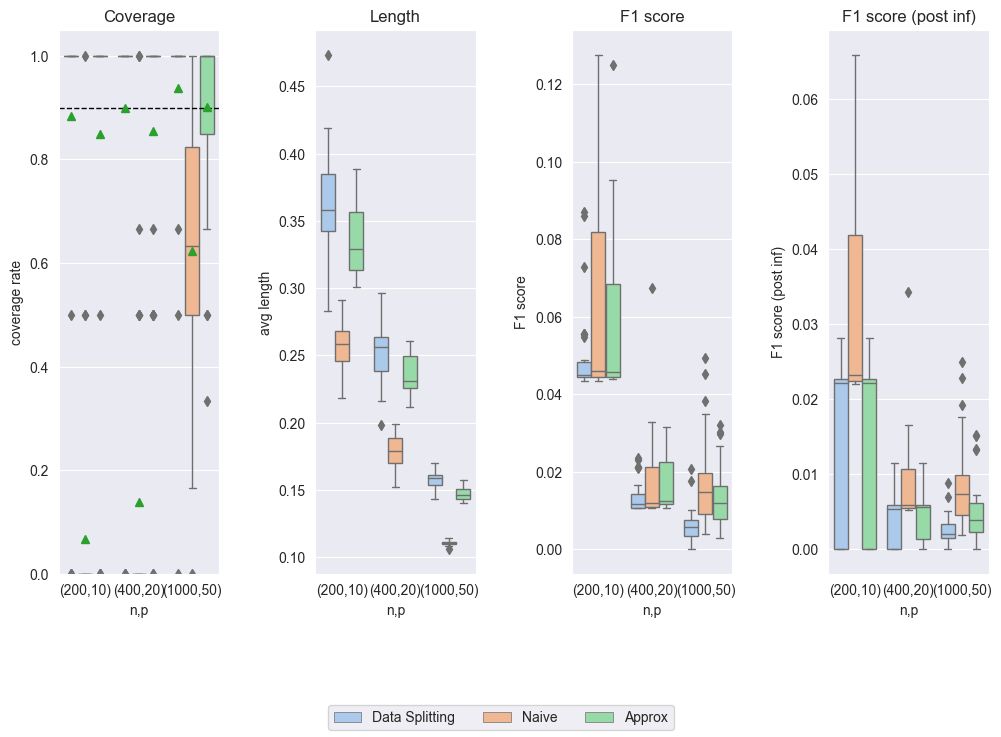

In [104]:
plotting_randomization(oper_char, x_axis="n,p", hue="method", plot_size=False)